# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"✅ Trip Verified | 5 days before the flight, w..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,✅ Trip Verified | Booked a flight from Buchar...
4,✅ Trip Verified | Booked online months ago an...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"✅ Trip Verified | 5 days before the flight, w..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,✅ Trip Verified | Booked a flight from Buchar...
4,✅ Trip Verified | Booked online months ago an...
...,...
995,✅ Trip Verified | Barcelona to New York via L...
996,✅ Trip Verified | Gatwick to Fort Lauderdale....
997,✅ Trip Verified | We recently flew from Londo...
998,✅ Trip Verified | \r\nVenice to London City. ...


In [6]:
df.reviews = df.reviews.str.split('|', expand = True)[1]

In [7]:
df

,reviews
0,"Boarded on time, but it took ages to get to ..."
1,"5 days before the flight, we were advised by..."
2,\r\nWe traveled to Lisbon for our dream vaca...
3,Booked a flight from Bucharest to Manchester...
4,Booked online months ago and the only hitch ...
...,...
995,Barcelona to New York via London. I was in B...
996,Gatwick to Fort Lauderdale. Charging to choo...
997,"We recently flew from London to Bologna, the..."
998,\r\nVenice to London City. Really we had a g...


In [8]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...
1,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...
2,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...
3,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester ...
4,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch w...


In [9]:
#Downloading vaderSentiment to quantify sentiment in each review
import requests
from pathlib import Path
if Path("vader_Sentiment.py").is_file():
    print("You already have the files")
else:
    print("Downloading files")
    request = requests.get("https://raw.githubusercontent.com/cjhutto/vaderSentiment/master/vaderSentiment/vaderSentiment.py")
    with open("vaderSentiment.py", "wb") as F:
        F.write(request.content)
from vaderSentiment import SentimentIntensityAnalyzer

downloading dem files


In [10]:
#quantify sentiment in each review
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Cleaned Reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df


,reviews,Cleaned Reviews,Sentiment,Analysis
0,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,0.5927,Positive
1,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,-0.8241,Negative
2,\r\nWe traveled to Lisbon for our dream vaca...,We traveled to Lisbon for our dream vacation ...,0.7964,Positive
3,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester ...,-0.6858,Negative
4,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch w...,-0.0671,Negative
...,...,...,...,...
995,Barcelona to New York via London. I was in B...,Barcelona to New York via London I was in Bar...,-0.8957,Negative
996,Gatwick to Fort Lauderdale. Charging to choo...,Gatwick to Fort Lauderdale Charging to choose...,0.2533,Neutral
997,"We recently flew from London to Bologna, the...",We recently flew from London to Bologna the a...,-0.7511,Negative
998,\r\nVenice to London City. Really we had a g...,Venice to London City Really we had a great e...,0.9460,Positive


In [16]:
vader_counts = df['Analysis'].value_counts()

vader_counts

Negative    494
Positive    404
Neutral     102
Name: Analysis, dtype: int64

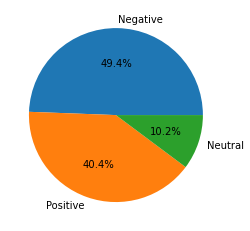

In [12]:
import matplotlib.pyplot as plt
plt.pie(vader_counts, labels = vader_counts.index, autopct='%1.1f%%')
plt.show()

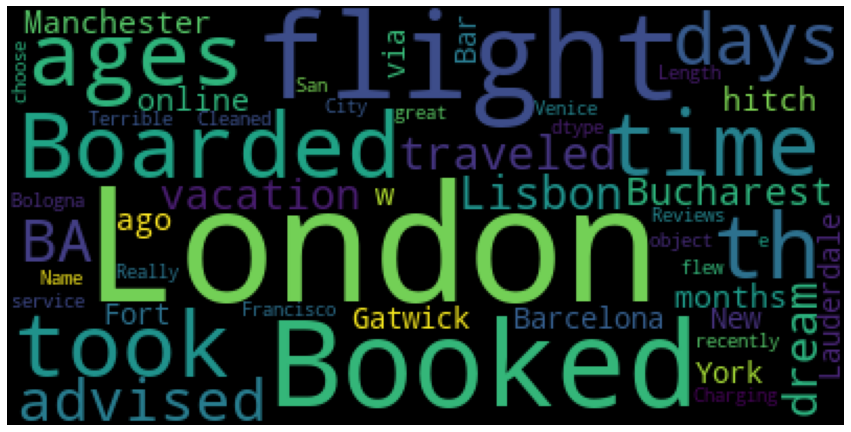

In [20]:
#wordcloud on all reviews
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        stopwords=stopwords)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Cleaned Reviews'])